<a href="https://colab.research.google.com/github/LukegCashman/Cashman_ECGR3090/blob/main/LC_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
# SECTION 0: File set-up and confirmation

# Pull the csv file for D3 from github
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'

# Read the data from D3
df = pd.read_csv(url)

# Print D3 to confirm there are no issues
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [119]:
# Seperate each of the columns into seperate variables
X1 = df.values[:,0]
X2 = df.values[:,1]
X3 = df.values[:,2]
Y = df.values[:,3]

# Print each variable to confirm there are no issues
print('X1 =',X1[:5])
print('X2 =',X2[:5])
print('X3 =',X3[:5])
print('Y =',Y[:5])

X1 = [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 = [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 = [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y = [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]


In [120]:
# Count number of samples in each variable
Size = len(Y)
print(Size)

100


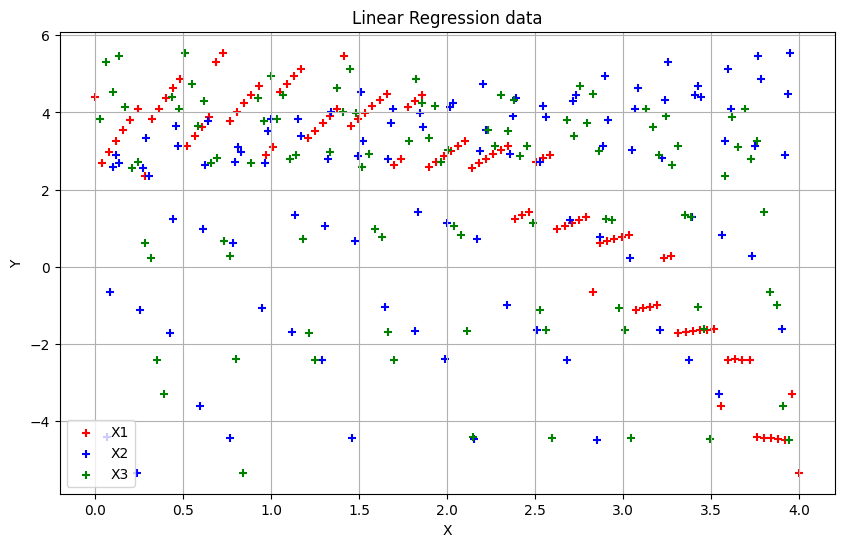

In [121]:
# Create a plot with each X variable vs Y
plt.scatter(X1, Y, color='red', marker='+', label='X1')
plt.scatter(X2, Y, color='blue', marker='+', label='X2')
plt.scatter(X3, Y, color='green', marker='+', label='X3')
plt.legend()

plt.grid(True)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression data')

plt.show()

In [122]:
# SECTION 1: Problem 1

# Initialize X0
X0 = np.ones((Size, 1))

# Set X variables as arrays
X1A = X1.reshape(Size, 1)
X2A = X2.reshape(Size, 1)
X3A = X3.reshape(Size, 1)

# Combine X variables with X0
X1F = np.hstack((X0, X1A))
X2F = np.hstack((X0, X2A))
X3F = np.hstack((X0, X3A))

In [123]:
# Create function to compute error
def comp_error(X, y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * Size) * np.sum(sqrErrors)
    return J

In [124]:
def gradient_descent(X, Y, Theta, Alpha, Iterations):
    #Create array to store error for each iteration
    m = len(Y)
    cost_history = np.zeros(Iterations)

    # repeat gradient decent 2000 times
    for i in range(Iterations):
        predictions = X.dot(Theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (Alpha / m) * X.transpose().dot(errors)
        Theta -= sum_delta
        cost_history[i] = comp_error(X, Y, Theta)

    return Theta, cost_history

In [125]:
# Initialize Theta, Alpha, and the number of trials
Theta = [0., 0.]
Iterations = 2000
Alpha = 0.01

In [126]:
# Find optimal Theta values for X1
Theta1, cost_history1 = gradient_descent(X1F, Y, Theta, Alpha, Iterations)
print('Final value of theta1 =', Theta1)
print('cost_history1 =', cost_history1)

Final value of theta1 = [ 5.8588686  -2.01145023]
cost_history1 = [5.48226715 5.44290965 5.40604087 ... 0.98560732 0.9856046  0.9856019 ]


In [127]:
# Find optimal Theta values for X2
Theta2, cost_history2 = gradient_descent(X2F, Y, Theta, Alpha, Iterations)
print('Final value of theta1 =', Theta2)
print('cost_history1 =', cost_history2)

Final value of theta1 = [0.73072498 0.55968422]
cost_history1 = [5.29831663 5.09909109 4.92356115 ... 3.59936968 3.59936967 3.59936965]


In [128]:
# Find optimal Theta values for X3
Theta3, cost_history3 = gradient_descent(X3F, Y, Theta, Alpha, Iterations)
print('Final value of theta1 =', Theta3)
print('cost_history1 =', cost_history3)

Final value of theta1 = [ 2.84191038 -0.50881117]
cost_history1 = [5.40768785 5.30397076 5.21178297 ... 3.62956537 3.62956486 3.62956435]


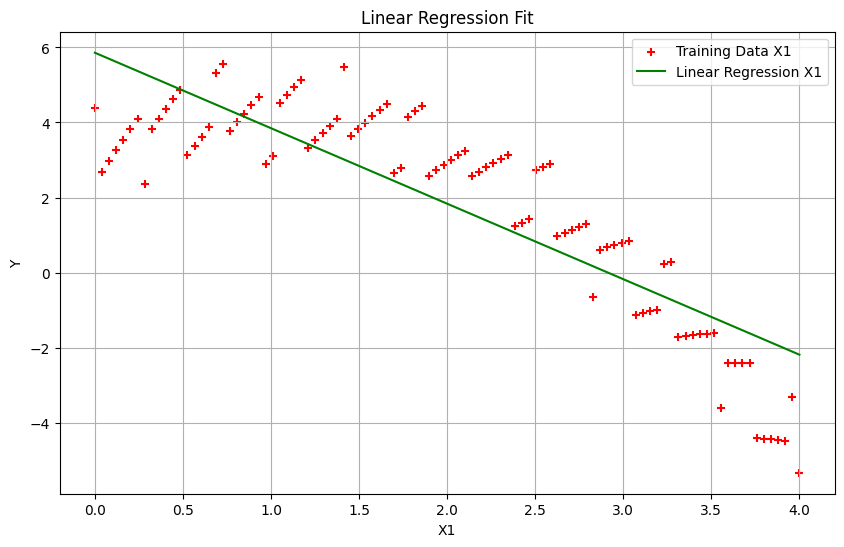

In [129]:
# Scatter plot for the X1 training data
plt.scatter(X1F[:, 1], Y, color='red', marker='+', label='Training Data X1')

# Line plot for the linear regression model
plt.plot(X1F[:, 1], X1F.dot(Theta1), color='green', label='Linear Regression X1')

plt.grid(True)
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

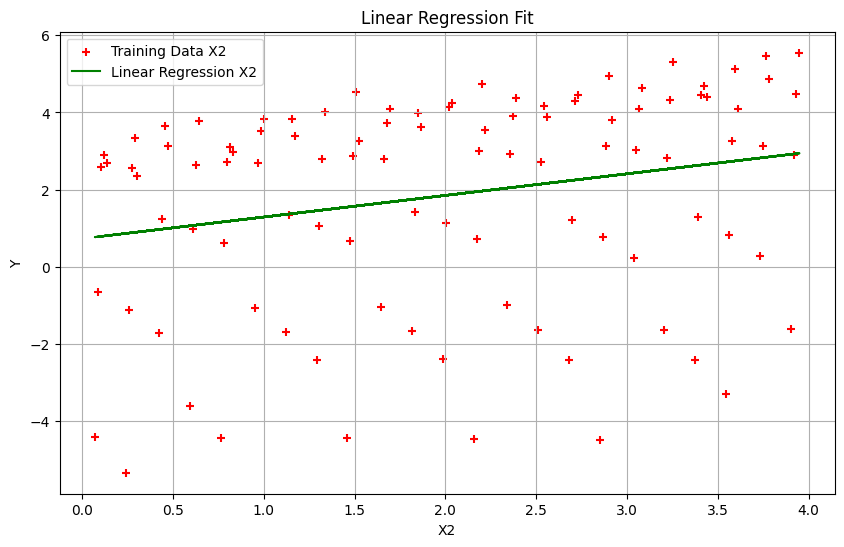

In [130]:
# Scatter plot for the X2 training data
plt.scatter(X2F[:, 1], Y, color='red', marker='+', label='Training Data X2')

# Line plot for the linear regression model
plt.plot(X2F[:, 1], X2F.dot(Theta2), color='green', label='Linear Regression X2')

plt.grid(True)
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

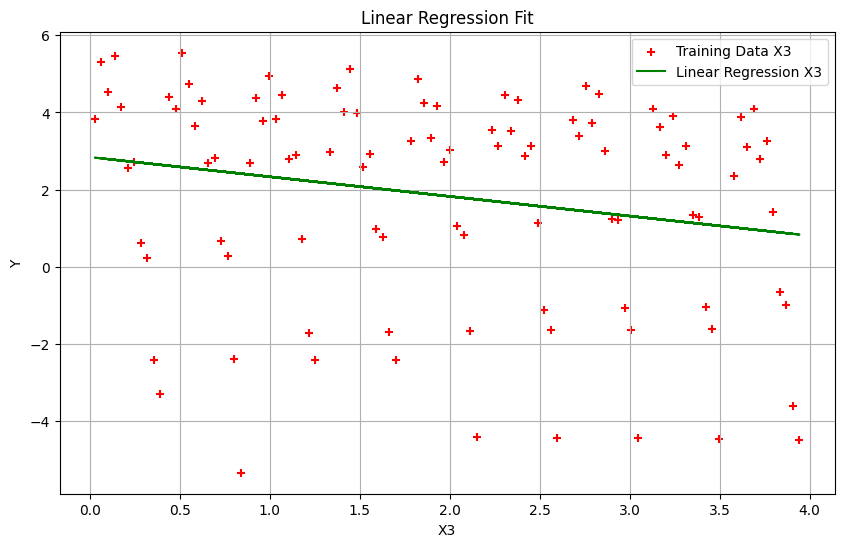

In [131]:
# Scatter plot for the X3 training data
plt.scatter(X3F[:, 1], Y, color='red', marker='+', label='Training Data X3')

# Line plot for the linear regression model
plt.plot(X3F[:, 1], X3F.dot(Theta3), color='green', label='Linear Regression X3')

plt.grid(True)
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

plt.show()

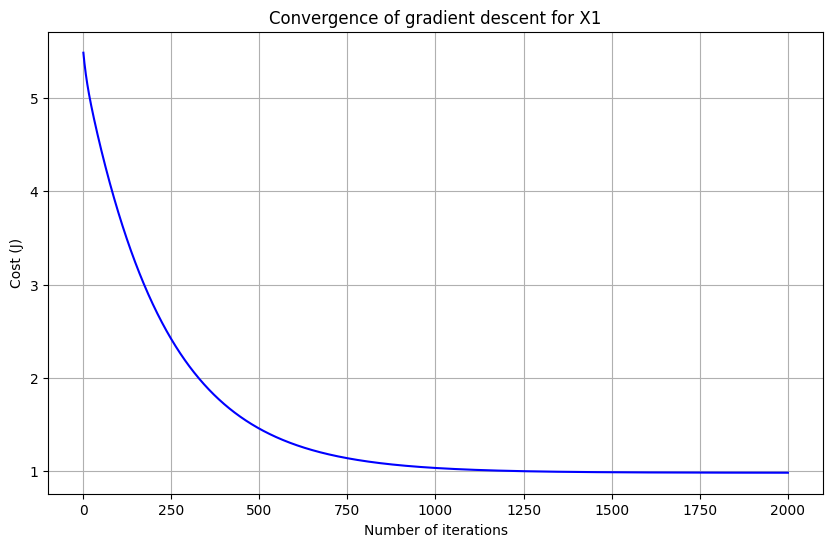

In [132]:
plt.plot(range(1, Iterations + 1), cost_history1, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X1')

# Show the plot
plt.show()

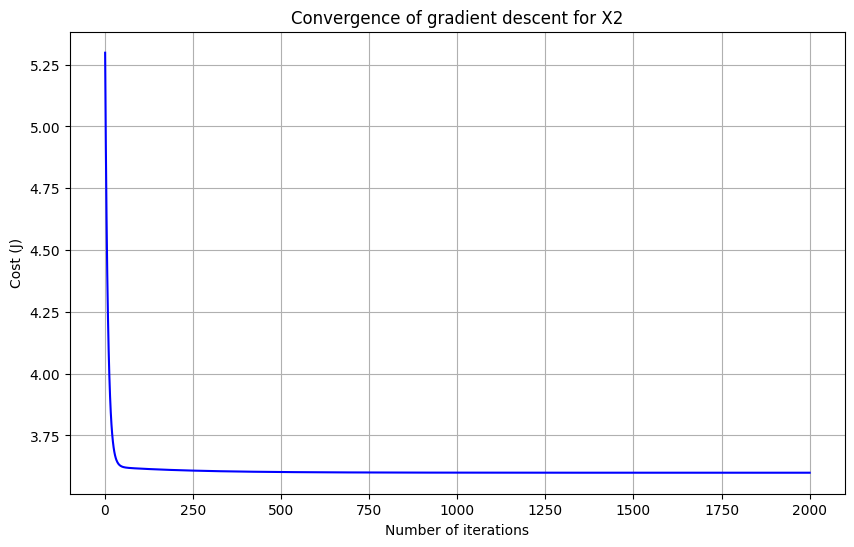

In [133]:
plt.plot(range(1, Iterations + 1), cost_history2, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X2')

# Show the plot
plt.show()

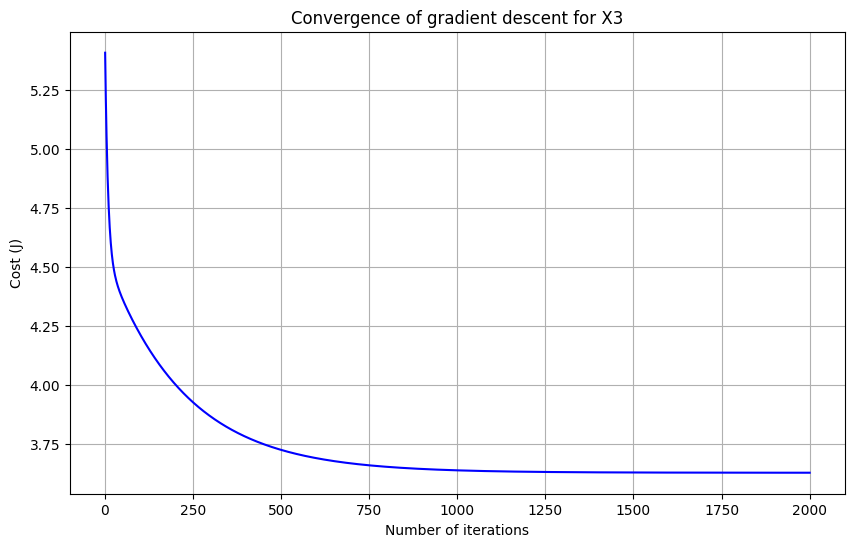

In [134]:
plt.plot(range(1, Iterations + 1), cost_history3, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent for X3')

# Show the plot
plt.show()